In [1]:
# coding: utf-8

"""
title: R0 estimation in Japan
date: 2020/03/21
author: okimebarun
url: https://github.com/okimebarun/01_COVID19_analysis
url: https://qiita.com/oki_mebarun
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import locale

In [2]:
font = {'family' : 'IPAexGothic'}
plt.rc('font', **font)

In [3]:
##########################################################################################

In [4]:
def readCsvOfJapanPref(pref : None):
    # 下記URLよりダウンロード
    # https://jag-japan.com/covid19map-readme/
    fcsv = u'COVID-19.csv'
    df = pd.read_csv(fcsv, header=0, encoding='utf8', parse_dates=[u'確定日YYYYMMDD'])
    # 確定日, 受診都道府県のみ抽出
    df1 = df.loc[:,[u'確定日YYYYMMDD',u'受診都道府県']]
    df1.columns = ['date','pref']
    # 受診都道府県で抽出
    if pref is not None: # Noneであれば日本全体
        df1 = df1[df1.pref == pref]
    df1 = df1.loc[:,'date']
    # 確定日でカウント
    df2 = pd.DataFrame( df1.value_counts() ).reset_index()
    df2.columns = ['date','P']
    df2 = df2.sort_values('date')
    return df2

In [5]:
def makeCalcFrame(days):
    t_1 = pd.Timestamp(2020,1,24) # 計算開始日
    td = pd.Timedelta('1 days')
    #
    npd = [[t_1 + td * i, 0, 0, 0 ] for i in range(0,days)]
    df1 = pd.DataFrame(npd)
    df1.columns = ['date', 'Ppre','Pat', 'R0']
    #
    return df1

In [6]:
def mergeCalcFrame(df1, df2):
    return pd.merge(df1, df2, on='date', how='left').fillna(0)

In [7]:
def calcR0(df, keys):
    lp = keys['lp']
    ip = keys['ip']
    nrow = len(df)
    getP = lambda s: df.loc[s, 'P'] if s < nrow else np.NaN
    for t in range(nrow):
        df.loc[t, 'Ppre'] = sum([ getP(s) for s in range(t+1, t + ip + 1)])
        df.loc[t, 'Pat' ] = getP(t + lp + ip)
        if df.loc[t, 'Ppre'] > 0:
            df.loc[t, 'R0'  ] = ip * df.loc[t, 'Pat'] / df.loc[t, 'Ppre']
        else:
            df.loc[t, 'R0'  ] = np.NaN
    return df

In [8]:
def showResult(df, title):
    # R0=1
    ptgt = pd.DataFrame([[df.iloc[0,0],1],[df.iloc[len(df)-1,0],1]])
    ptgt.columns = ['date','target']
    # show R0
    plt.rcParams["font.size"] = 12
    ax = df.plot(title=title,x='date',y='R0', figsize=(10,7))
    ptgt.plot(x='date',y='target',style='r--',ax=ax)
    ax.grid(True)
    ax.set_ylim(0,)
    plt.show()
    fig = ax.get_figure()
    fig.savefig("R0_{}.png".format(title))

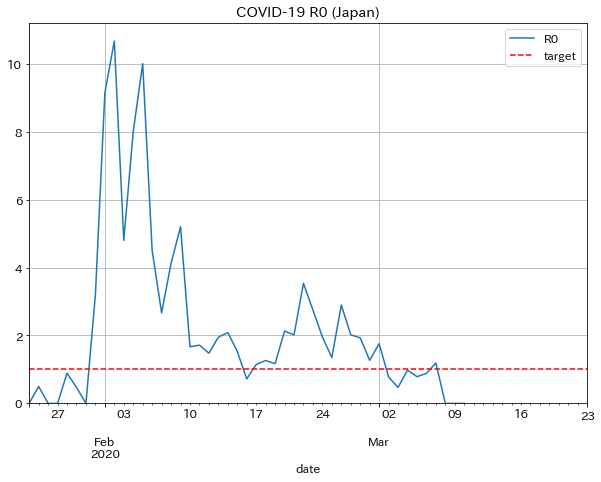

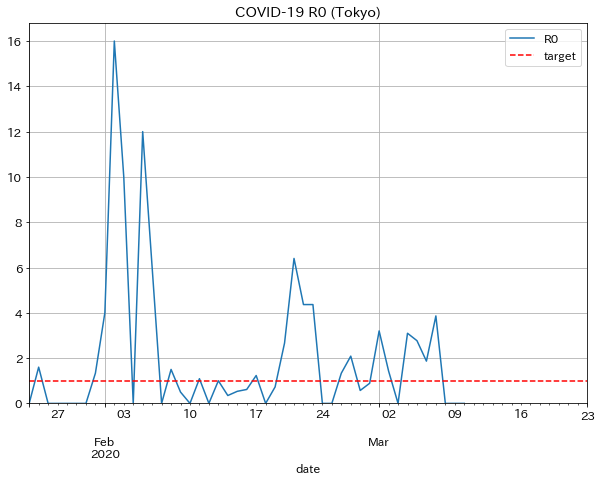

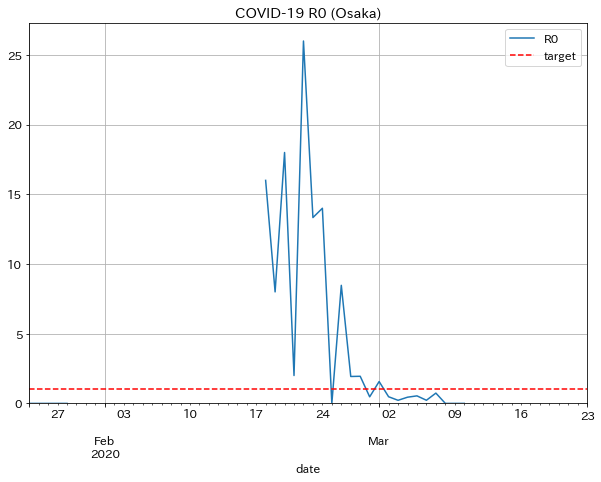

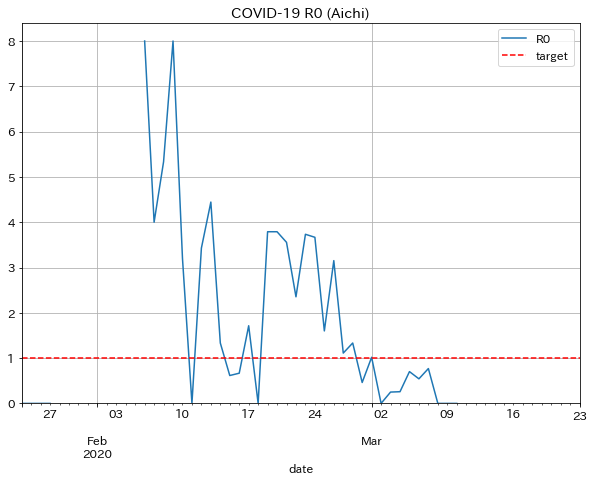

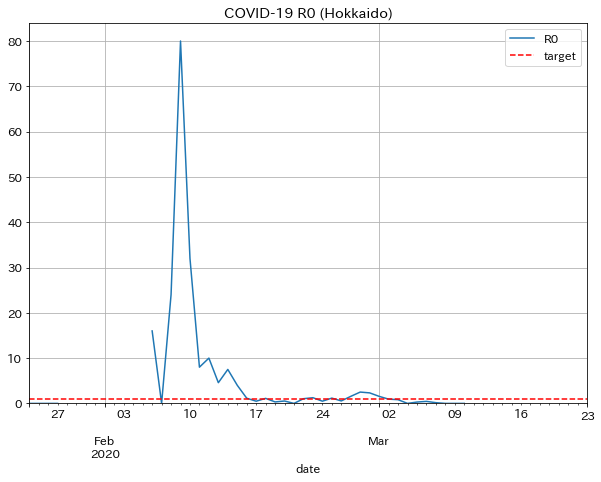

In [9]:
def R0inJapanPref(pref, label):
    keys = {'lp':5, 'ip':8 }
    df1 = makeCalcFrame(60) # 60 days
    df2 = readCsvOfJapanPref(pref)
    df = mergeCalcFrame(df1, df2)
    df = calcR0(df, keys)
    showResult(df, 'COVID-19 R0 ({})'.format(label))
    return df

preflist = [[None, 'Japan'], [u'東京都', 'Tokyo'],\
            [u'大阪府', 'Osaka'],  [u'愛知県', 'Aichi'],\
            [u'北海道', 'Hokkaido']]
dflist = [[R0inJapanPref(pref, label), label] for pref, label in preflist]

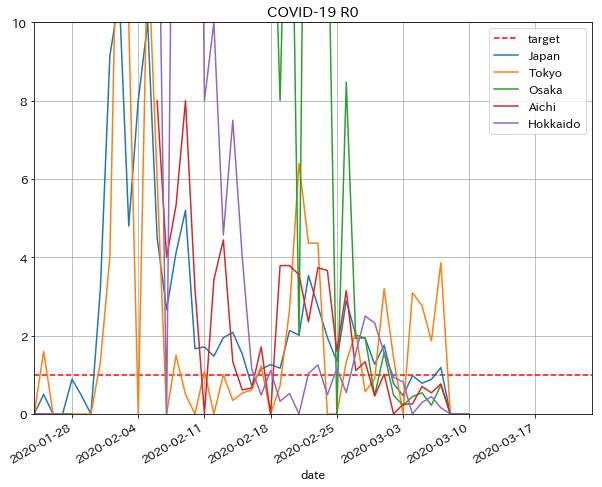

In [10]:
def showResult2(ax, df, label):
    # show R0
    plt.rcParams["font.size"] = 12
    df1 = df.rename(columns={'R0':label})
    df1.plot(x='date',y=label, ax=ax)

# R0=1
dfs = dflist[0][0]
ptgt = pd.DataFrame([[dfs.iloc[0,0],1],[dfs.iloc[len(dfs)-1,0],1]])
ptgt.columns = ['date','target']
ax = ptgt.plot(title='COVID-19 R0', x='date',y='target',style='r--', figsize=(10,8))
#
for df, label in dflist:
    showResult2(ax, df, label)
#
ax.grid(True)
ax.set_ylim(0,10)
plt.show()

In [11]:
##########################################################################################

In [12]:
def getJapanPrefList():
    # 下記URLよりダウンロード
    # https://jag-japan.com/covid19map-readme/
    fcsv = u'COVID-19.csv'
    df = pd.read_csv(fcsv, header=0, encoding='utf8', parse_dates=[u'確定日YYYYMMDD'])
    # 確定日, 受診都道府県のみ抽出
    df1 = df.loc[:,[u'受診都道府県']]
    df1.columns = ['pref']
    df1 = df1[~df1.duplicated()]
    preflist = [e[0] for e in df1.values.tolist()]
    return preflist

In [13]:
preflist = getJapanPrefList()
preflist

['神奈川県',
 '東京都',
 '愛知県',
 '奈良県',
 '北海道',
 '大阪府',
 '千葉県',
 '三重県',
 '京都府',
 '埼玉県',
 '和歌山県',
 '沖縄県',
 '不明',
 '福岡県',
 '石川県',
 '熊本県',
 '栃木県',
 '長野県',
 '徳島県',
 '岐阜県',
 '静岡県',
 '高知県',
 '新潟県',
 '宮城県',
 '兵庫県',
 '愛媛県',
 '大分県',
 '山口県',
 '宮崎県',
 '滋賀県',
 '山梨県',
 '秋田県',
 '広島県',
 '福島県',
 '群馬県',
 '佐賀県',
 '長崎県',
 '香川県',
 '茨城県',
 '福井県']

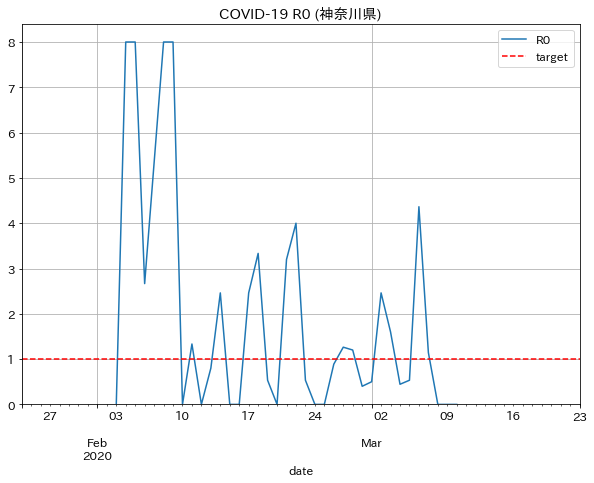

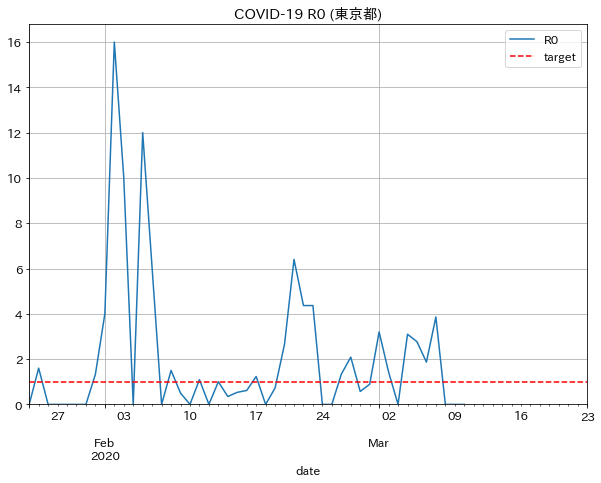

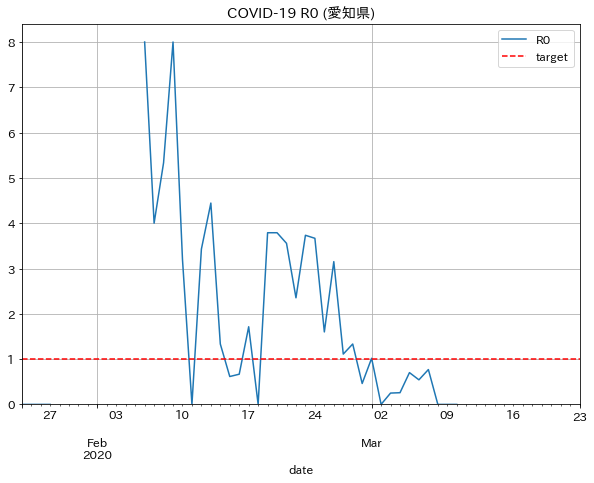

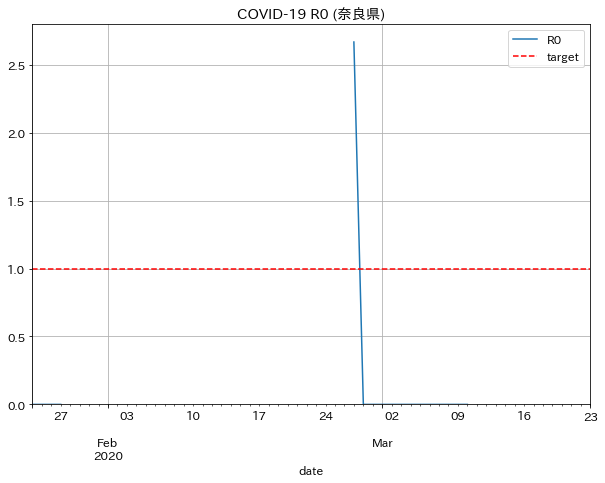

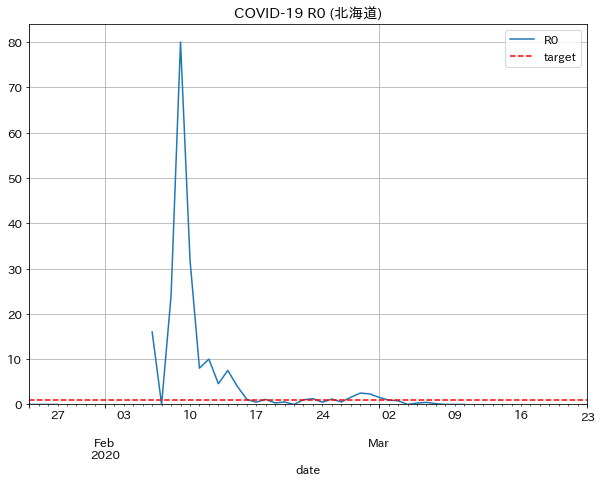

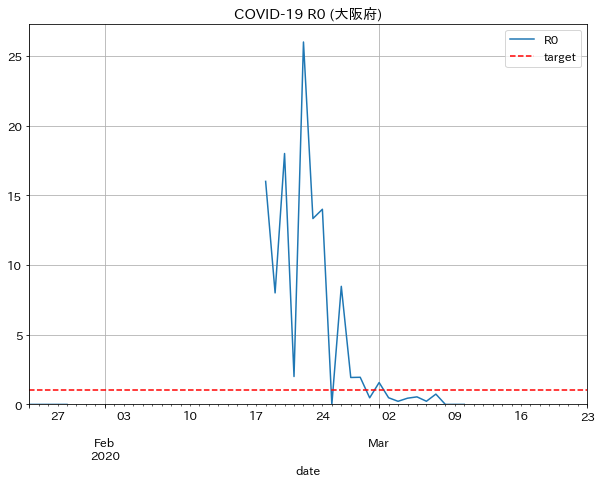

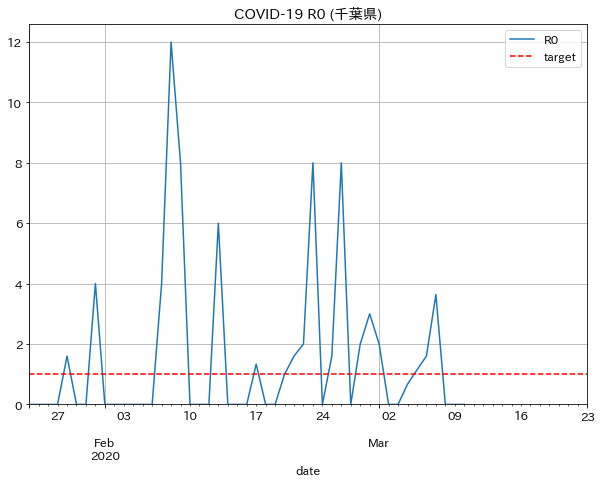

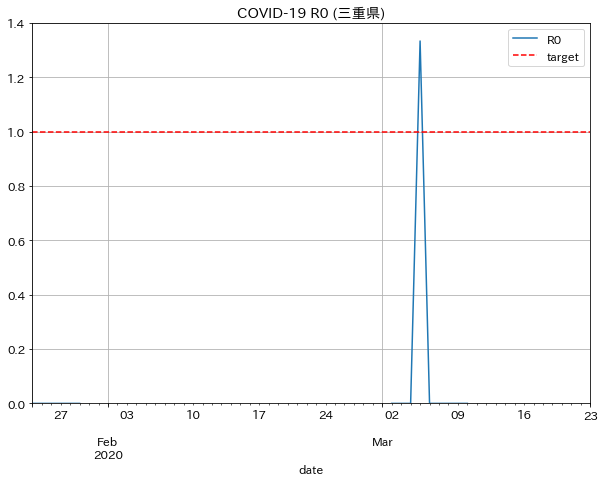

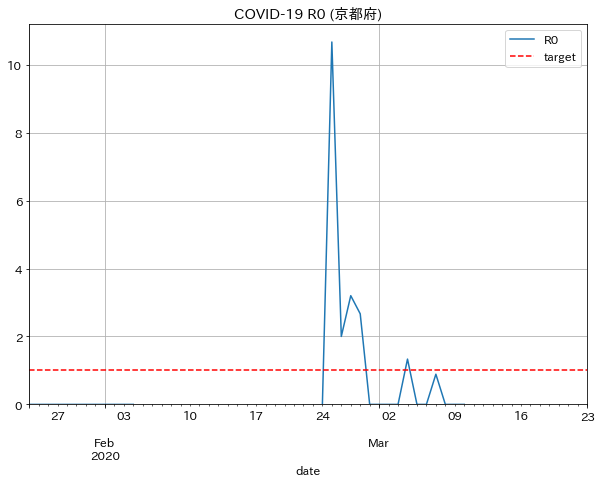

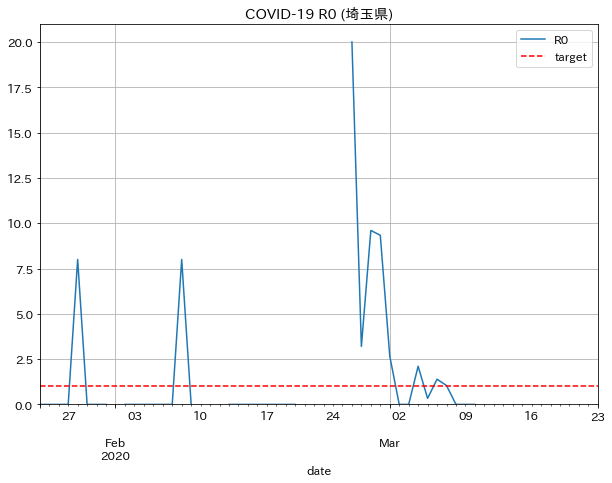

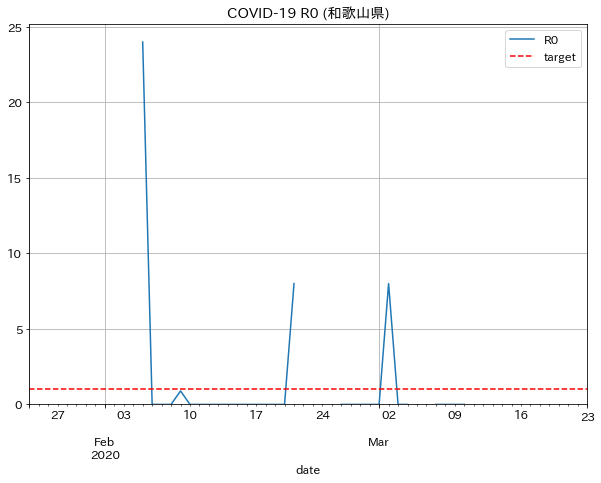

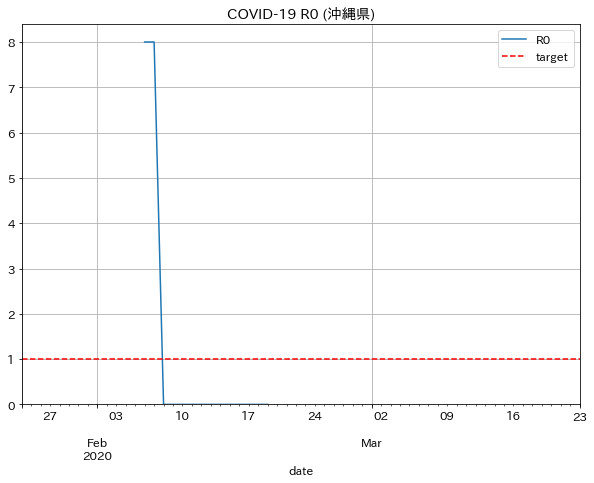

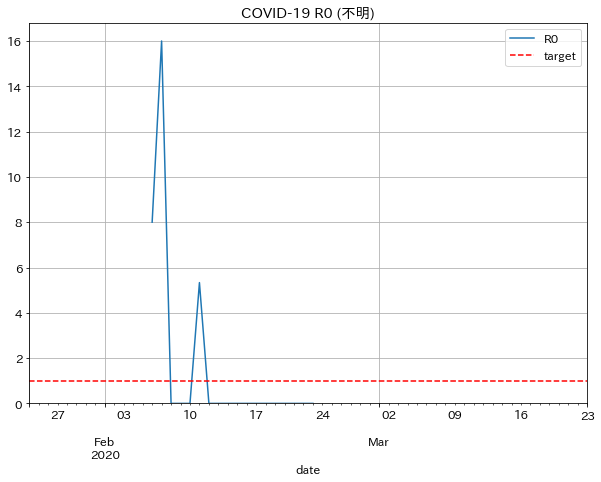

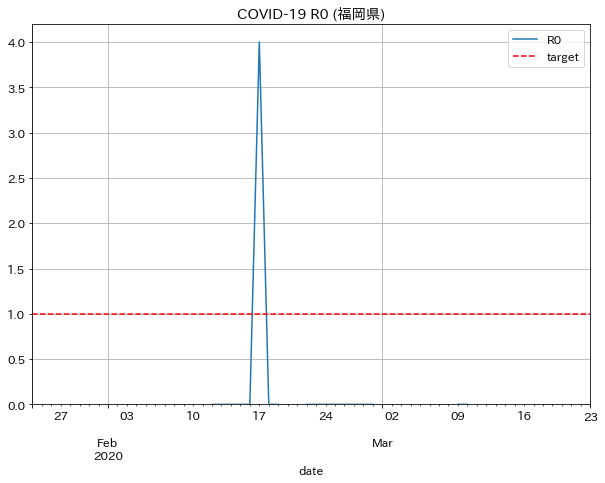

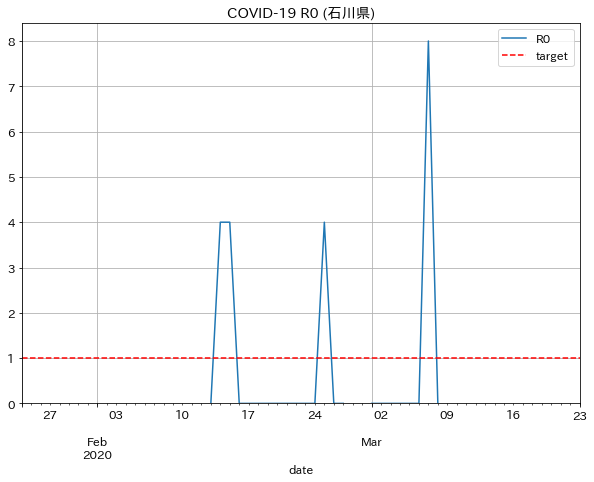

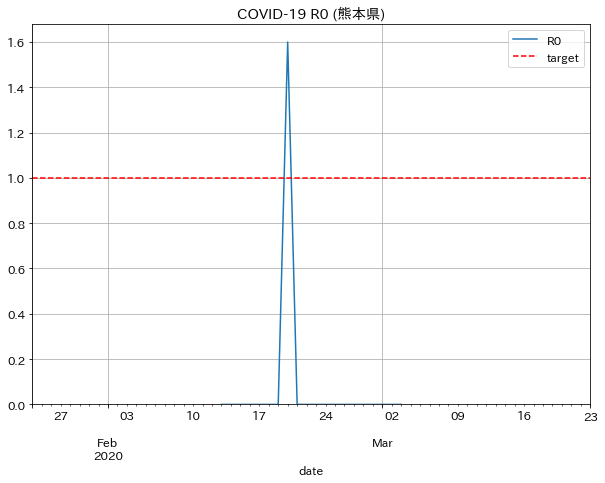

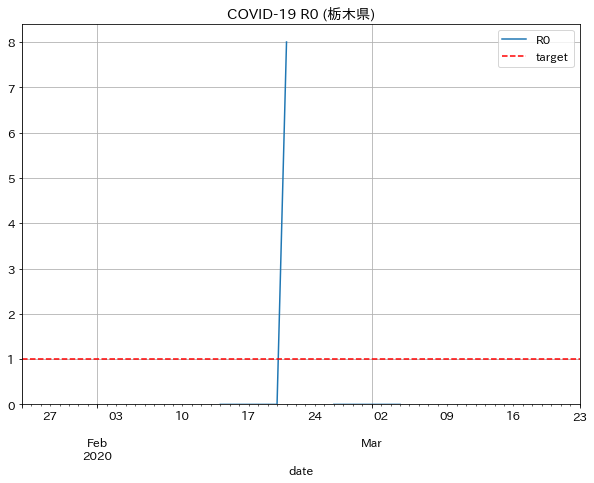

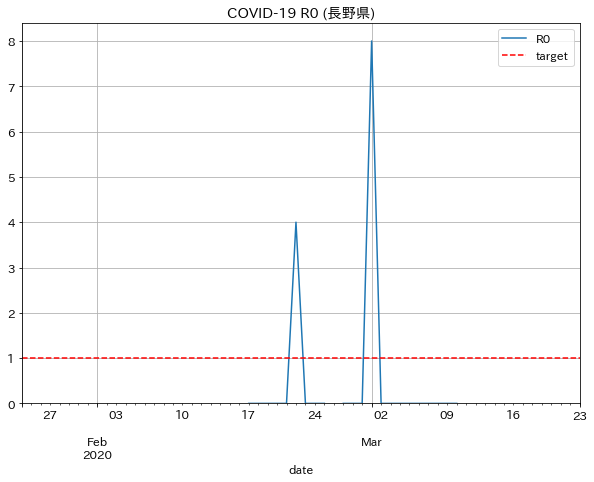

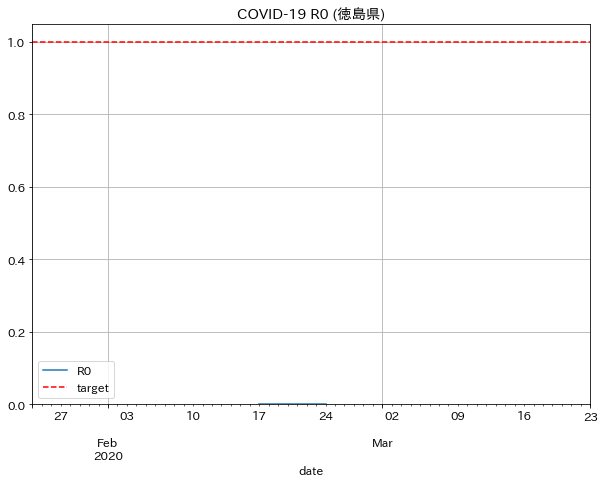

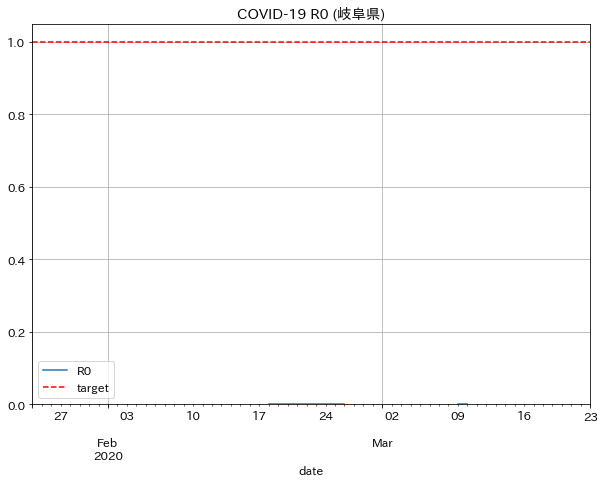

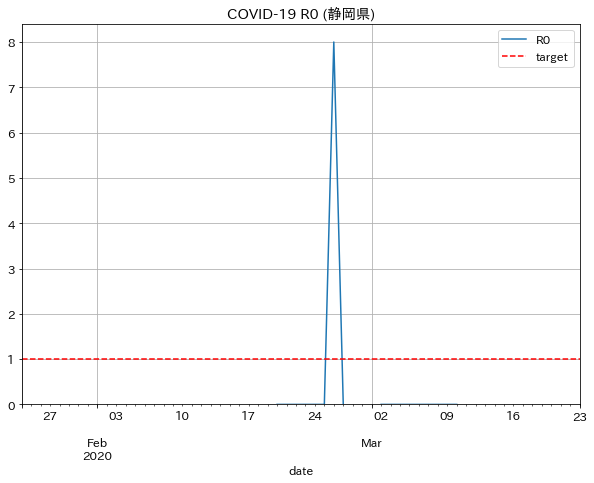

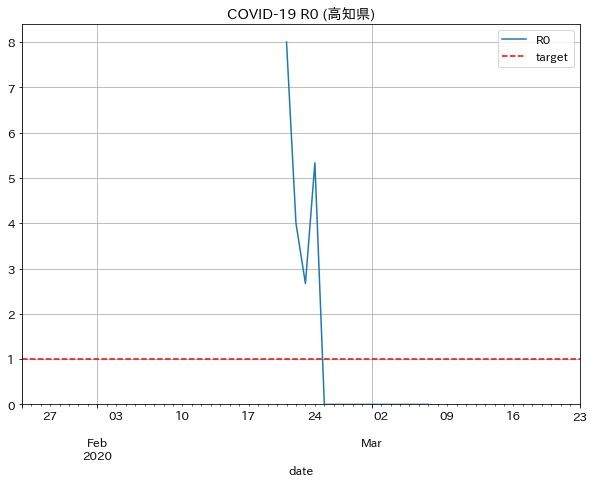

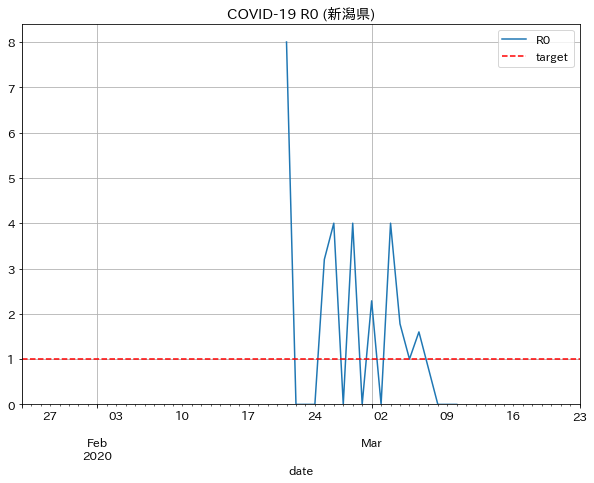

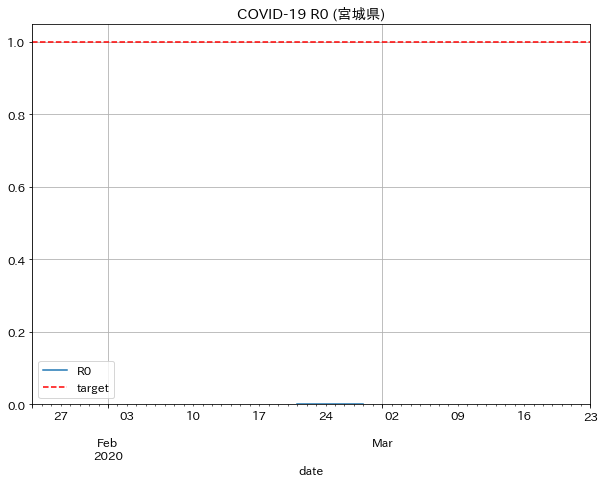

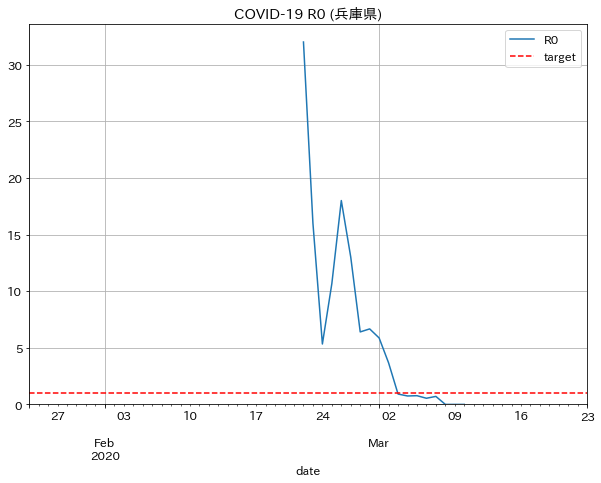

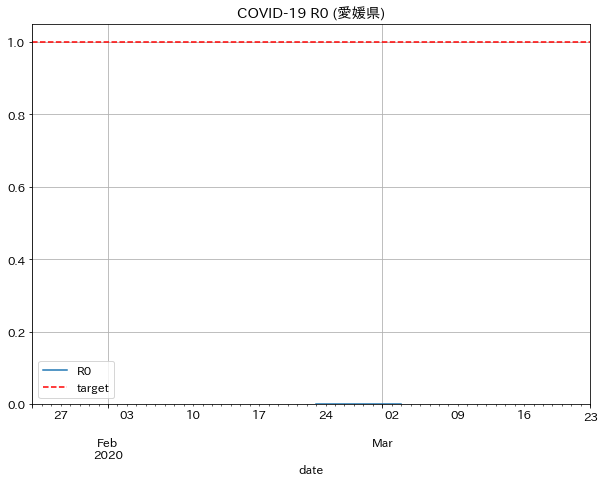

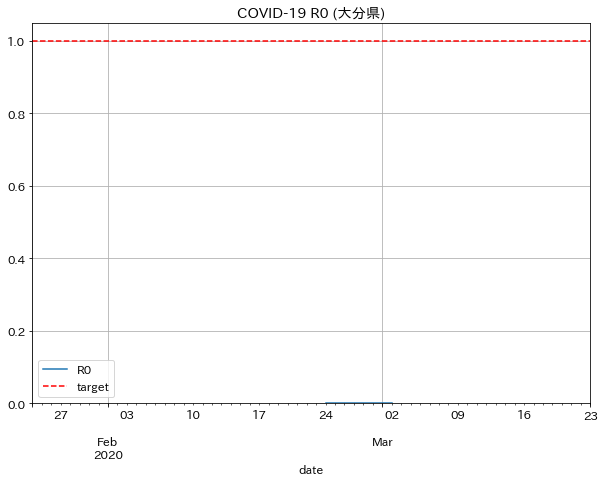

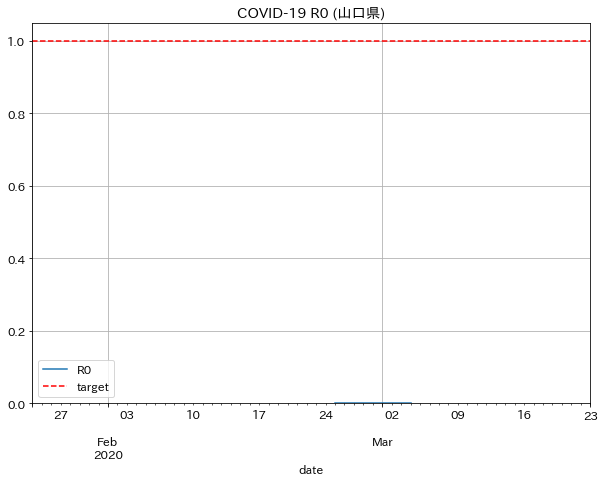

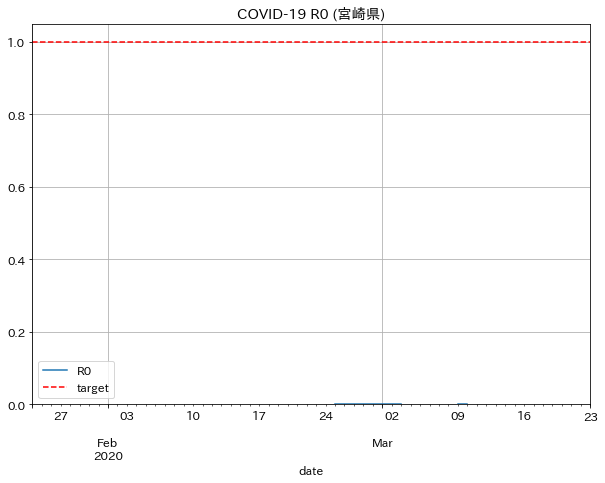

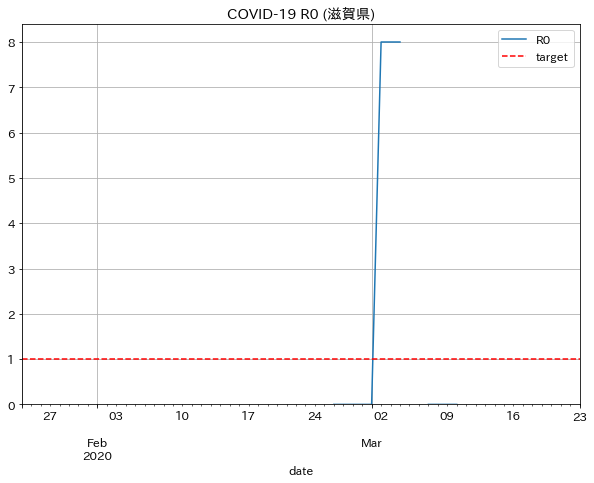

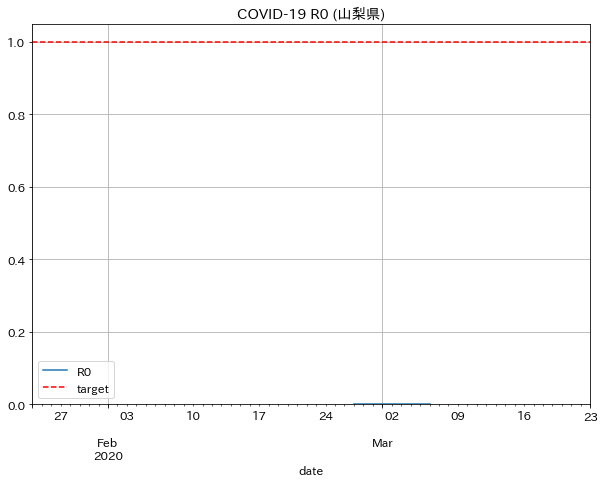

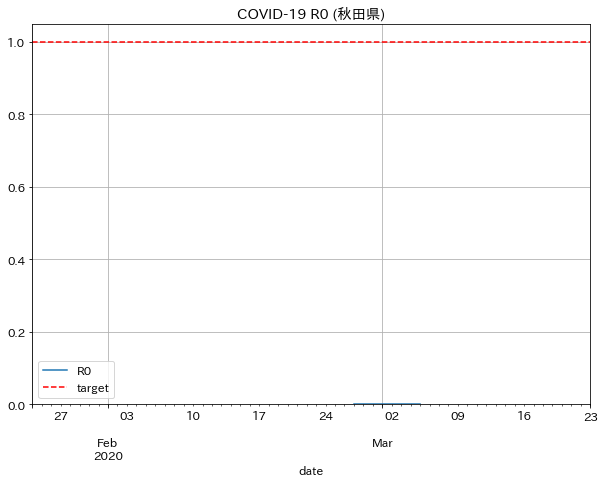

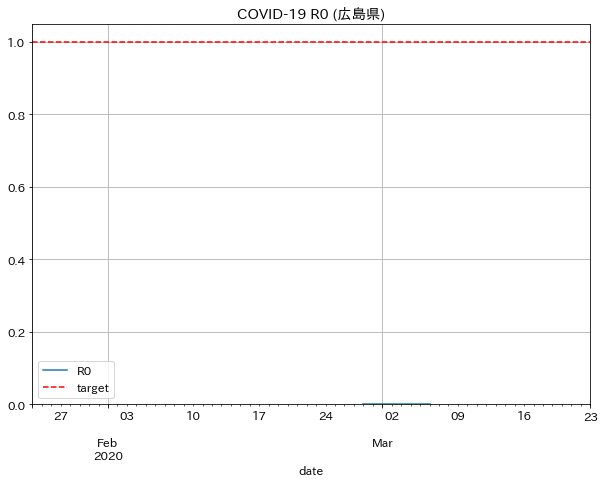

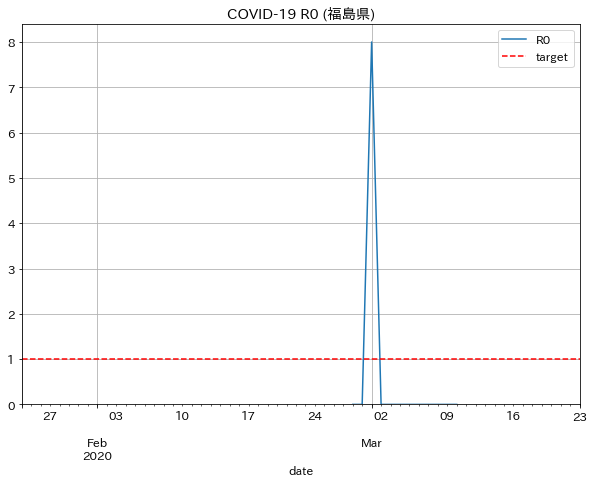

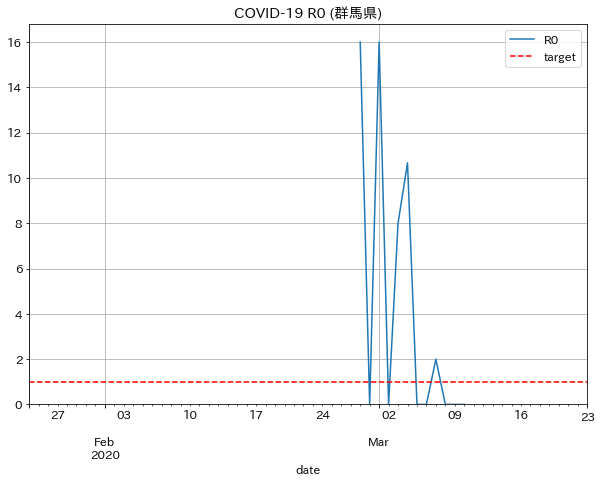

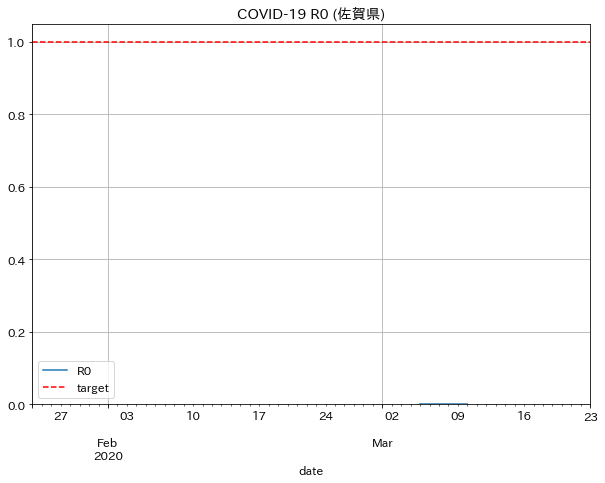

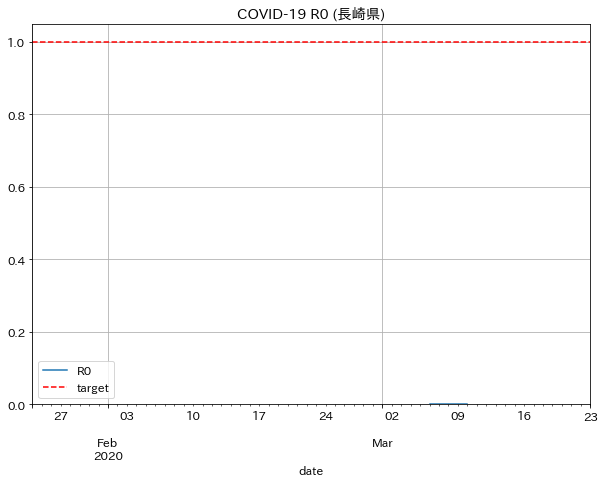

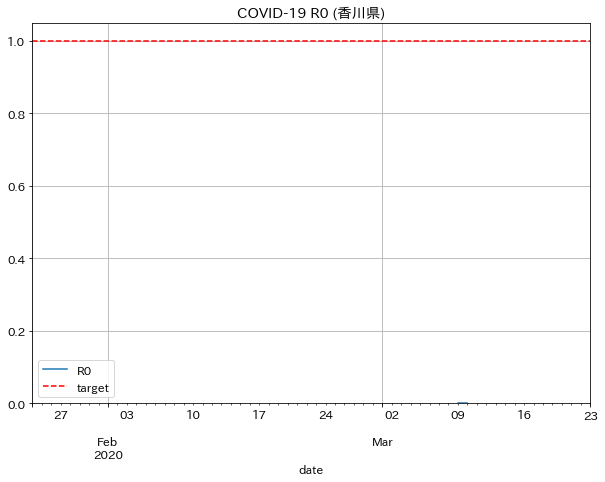

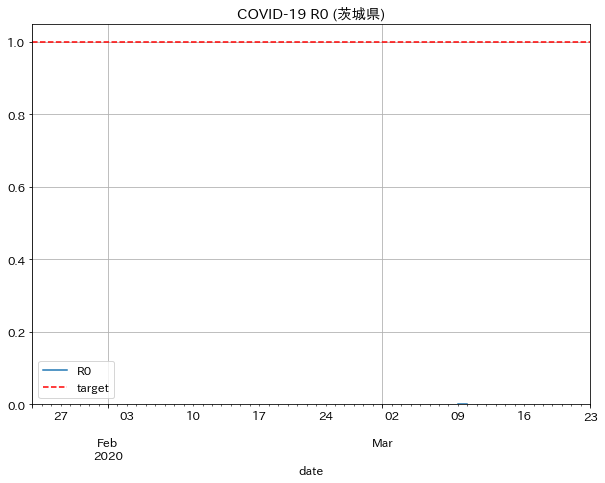

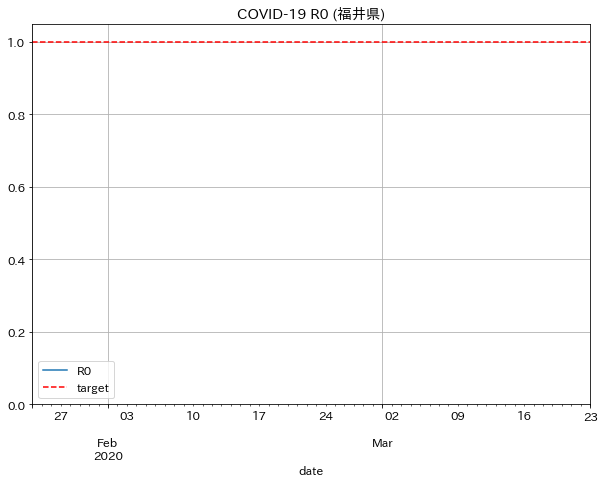

In [14]:
def R0inJapanPref2(pref):
    keys = {'lp':5, 'ip':8 }
    df1 = makeCalcFrame(60) # 60 days
    df2 = readCsvOfJapanPref(pref)
    df = mergeCalcFrame(df1, df2)
    df = calcR0(df, keys)
    showResult(df, u'COVID-19 R0 ({})'.format(pref))
    return df

dflist = [ [R0inJapanPref2(pref), pref] for pref in preflist]

In [15]:
def calcR0Average(df, st, ed):
    df1 = df[(st <= df.date) & (df.date <= ed) ]
    df2 = df1[np.isnan(df1.R0) == False]
    df3 = df2['R0']
    ave = np.average(df3) if len(df3) > 0 else 0
    return ave

In [16]:
def calcR0AveRank(dflist, st, ed):
    R0AveRank = [ [pref, calcR0Average(df, st, ed)] for df, pref in dflist]
    R0AveRank.sort(key = lambda x: x[1], reverse=True)
    df = pd.DataFrame(R0AveRank)
    df.columns = ['pref','R0ave']
    return df

In [17]:
def showRank(dflist, maxn, title):
    ax = dflist.iloc[0:maxn,:].plot.barh(y='R0ave',x='pref',figsize=(8,10))
    ax.invert_yaxis()
    ax.grid(True, axis='x')
    ax.spines['bottom'].set_position(('axes',1.05))
    plt.title(title, y=1.05)
    plt.show()
    return ax

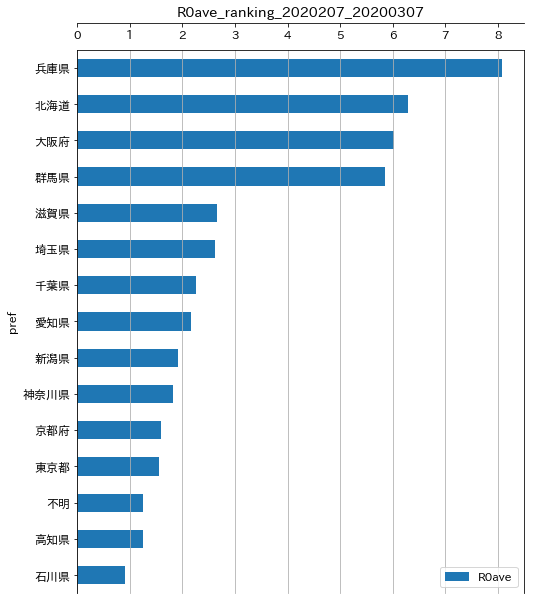

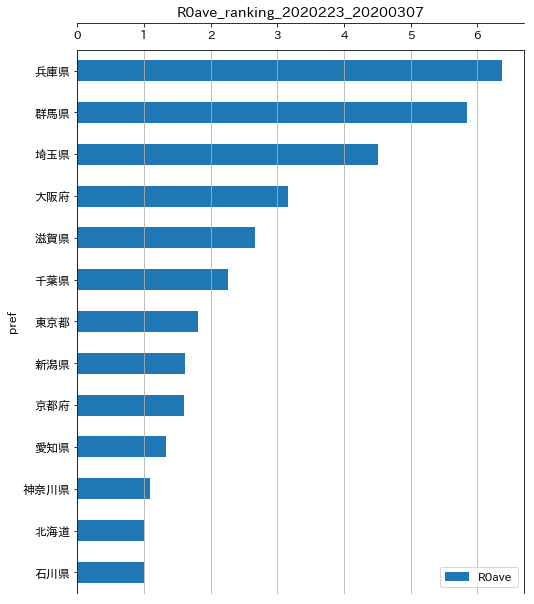

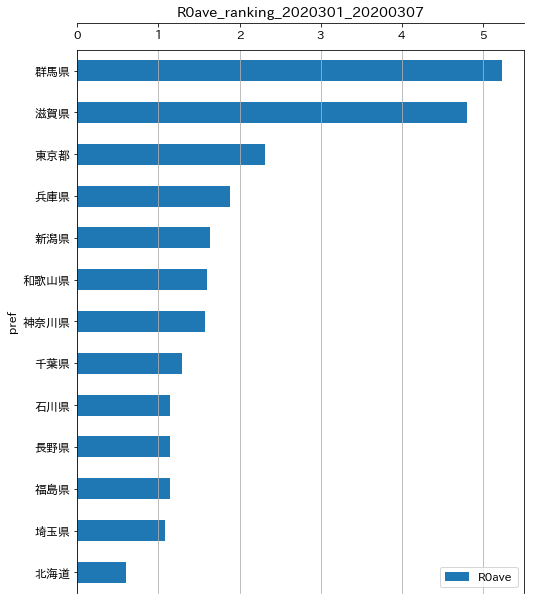

In [18]:
# 2020/2/7 から 2020/3/7
st = pd.Timestamp(2020,2,7)
ed = pd.Timestamp(2020,3,7)
title = "R0ave_ranking_2020207_20200307"
dfR0_1 = calcR0AveRank(dflist, st, ed)
ax = showRank(dfR0_1, 15, title)
fig = ax.get_figure()
fig.savefig("{}.jpg".format(title))
# 2020/2/23 から 2020/3/7
st = pd.Timestamp(2020,2,23)
ed = pd.Timestamp(2020,3,7)
title = "R0ave_ranking_2020223_20200307"
dfR0_1 = calcR0AveRank(dflist, st, ed)
ax = showRank(dfR0_1, 13, title)
fig = ax.get_figure()
fig.savefig("{}.jpg".format(title))
# 2020/3/1 から 2020/3/7
st = pd.Timestamp(2020,3,1)
ed = pd.Timestamp(2020,3,7)
title = "R0ave_ranking_2020301_20200307"
dfR0_2 = calcR0AveRank(dflist, st, ed)
ax = showRank(dfR0_2, 13, title)
fig = ax.get_figure()
fig.savefig("{}.jpg".format(title))